# count no of words in heading

## 1. Number of most words in heading

In [1]:
import pandas as pd
dataset="code/news_summary.csv"
df=pd.read_csv(dataset,encoding='latin1',parse_dates=['date'])
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
head=df.headlines
var=Counter(" ".join(df["headlines"]).split()).most_common(50)
top_50_words=[item[0] for item in var]
top_50_word_occurances=[item[1] for item in var]

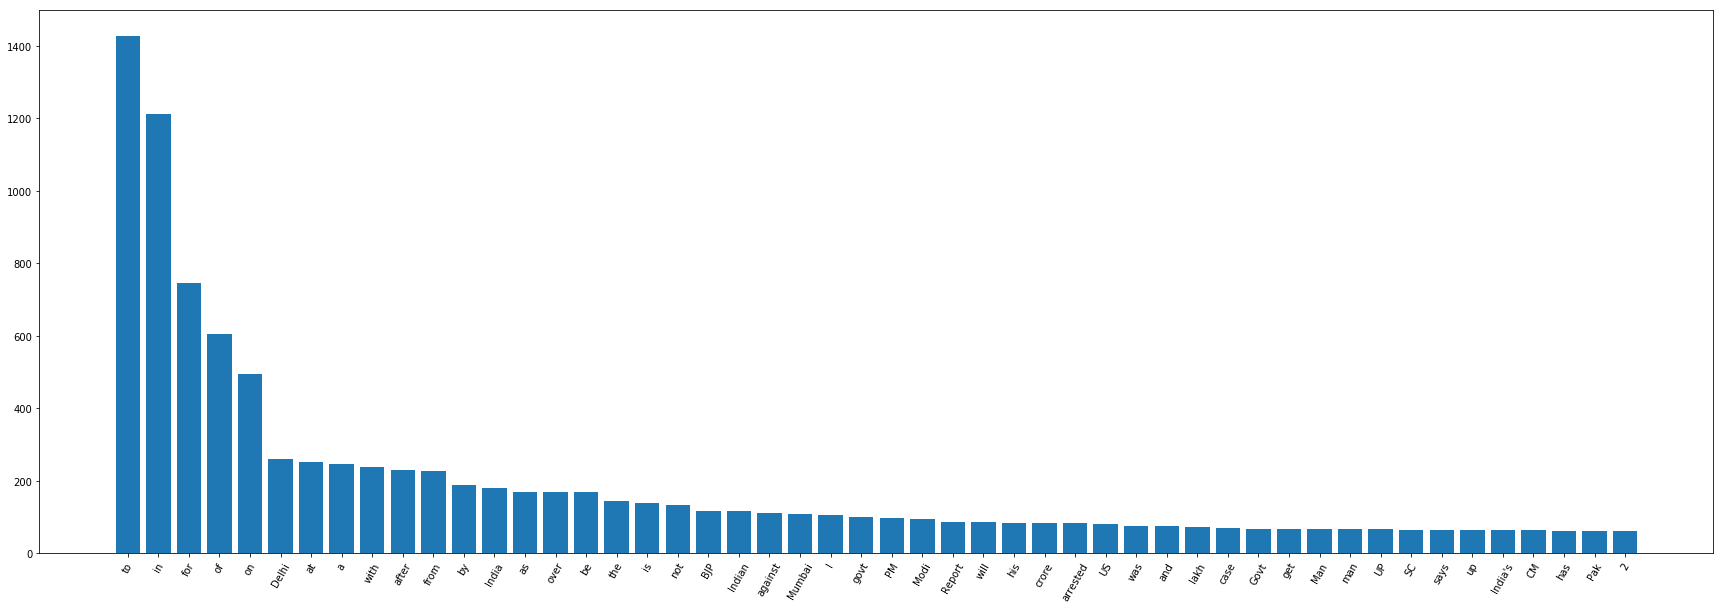

In [3]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=60)
plt.bar(top_50_words,top_50_word_occurances)
plt.show()

In [4]:
pd.DataFrame(top_50_word_occurances, top_50_words)

,0
to,1428
in,1212
for,746
of,605
on,494
Delhi,261
at,251
a,247
with,238
after,230


In [5]:
df1 = pd.DataFrame({'x' : top_50_words , 'y' : top_50_word_occurances})

# count no of text

In [6]:
df1

,x,y
0,to,1428
1,in,1212
2,for,746
3,of,605
4,on,494
5,Delhi,261
6,at,251
7,a,247
8,with,238
9,after,230


##  2.Number of most words in text

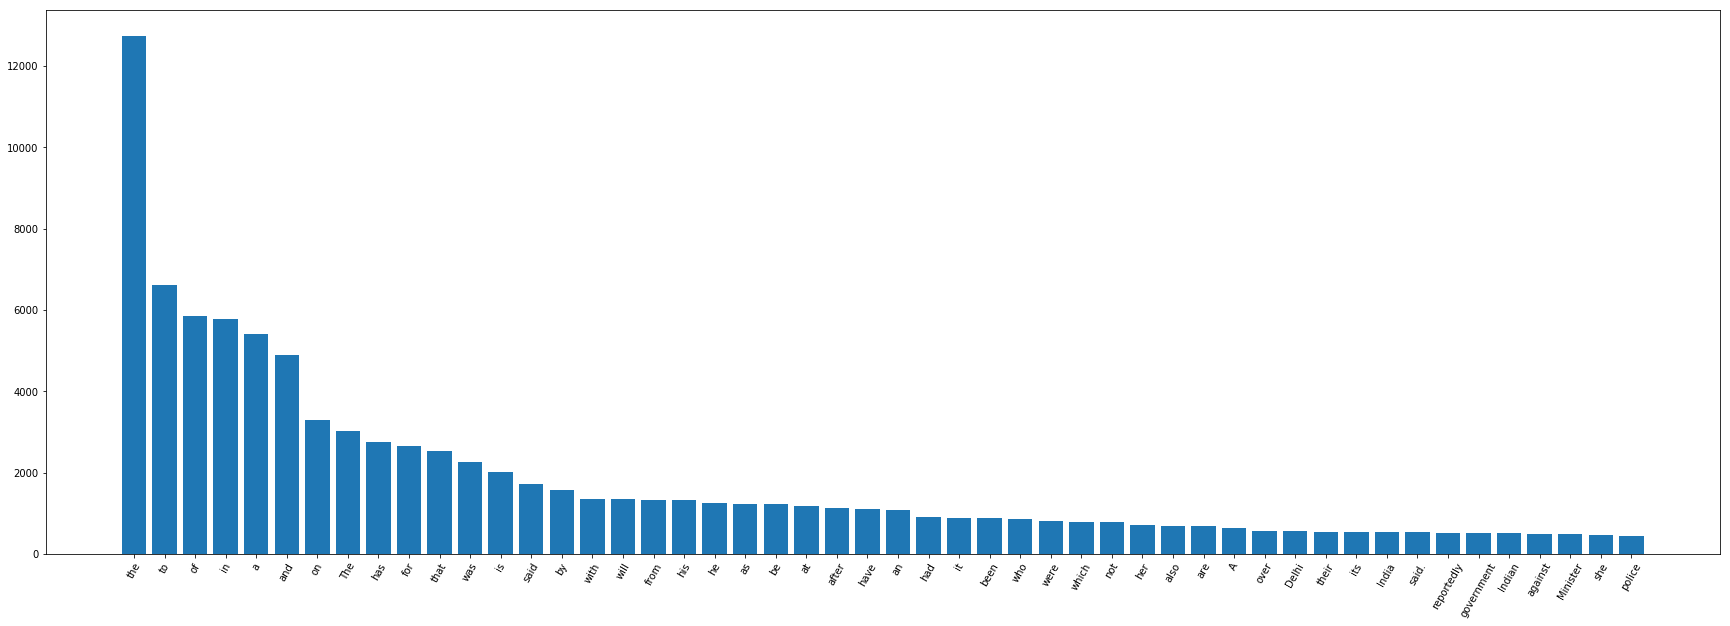

In [7]:
var1=Counter(" ".join(df["text"]).split()).most_common(50)
top_50_words1=[item[0] for item in var1]
top_50_word_occurances1=[item[1] for item in var1]
plt.figure(figsize=(30,10))
plt.xticks(rotation=60)
plt.bar(top_50_words1,top_50_word_occurances1)
# plt.savefig('visualizations/figure2.png')
plt.show()

### 3.all over sentiment author wise

In [8]:
authors=df.author.unique()
author_text=[]

for author in authors:
    author_text.append(' '.join(df.loc[df.author==author].headlines.values))
from textblob import TextBlob
sentiment={}
for text in author_text:
    blob=TextBlob(text)
    if(blob.sentiment.polarity>0):
        if("positive" in sentiment):
            sentiment["positive"] += 1
        else:
            sentiment["positive"]=1
    elif(blob.sentiment.polarity==0):
        if("neutral" in sentiment):
            sentiment["neutral"] += 1
        else:
            sentiment["neutral"]=1
    else:
        if("negative" in sentiment):
            sentiment["negative"] += 1
        else:
            sentiment["negative"]=1



In [9]:
pd.DataFrame(sentiment.values(), sentiment.keys())

,0
positive,35
negative,9
neutral,1


In [10]:
sentiment

{'positive': 35, 'negative': 9, 'neutral': 1}

In [11]:
plt.bar(x,y,color='rbg',linewidth='3')
plt.xticks(rotation=60)
plt.savefig('visualizations/figure3.png')
plt.show()

NameError: name 'x' is not defined

###  4.date wise author's news count 

In [12]:
news_count_datewise=df.groupby("date").count().author

In [13]:
x=df.date.unique()
y=df.groupby("date").count().author

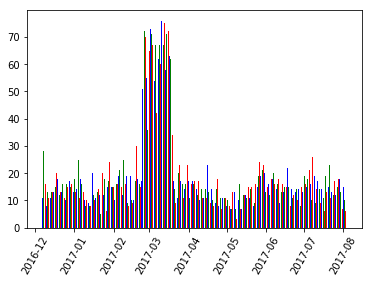

In [14]:
plt.bar(x,y,color='rgb')
plt.xticks(rotation=60)
plt.savefig('visualizations/figure4.png')
plt.show()

### 4.word cloud

In [66]:
from wordcloud import WordCloud, STOPWORDS 

  
#  
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

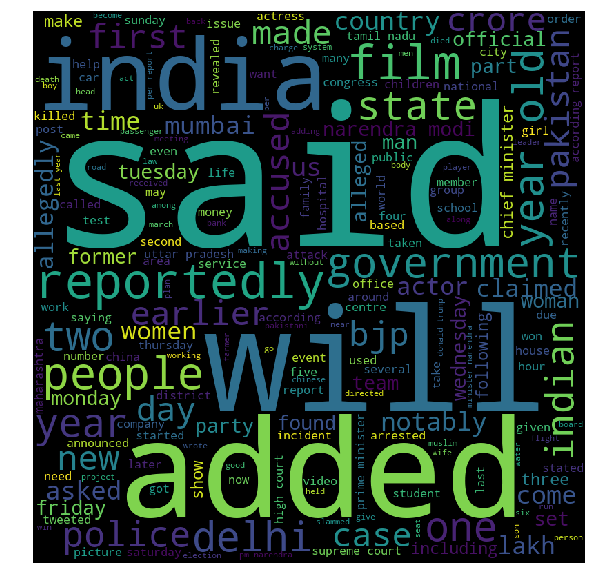

In [67]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.savefig('figures/wordcloud1.png')
plt.show()

In [ ]:
df.head()

## 5. heading all over sentiment

In [16]:
head_pos = 0
head_neg = 0
head_neu = 0
for headline in df.headlines.values:
    blob = TextBlob(headline)
    var=blob.sentiment.polarity
    if(var>0):
        head_pos+=1
    elif(var==0):
        head_neu+=1
    else:
        head_neg+=1
print(head_pos)
print(head_neg)
print(head_neu)


811
594
3109


In [17]:
var={"head_pos":811,"head_neg":594,"head_neu":3109}
x=var.keys()
y=var.values()

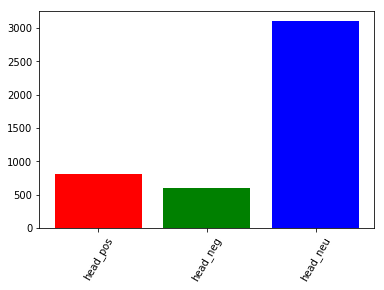

In [18]:
plt.bar(x,y,color='rgb')
plt.xticks(rotation=60)
plt.savefig('visualizations/figure5.png')
plt.show()

## 6. text all over sentiment

In [19]:
head_pos = 0
head_neg = 0
head_neu = 0
for text in df.text.values:
    blob = TextBlob(text)
    var=blob.sentiment.polarity
    if(var>0):
        head_pos+=1
    elif(var==0):
        head_neu+=1
    else:
        head_neg+=1
print(head_pos)
print(head_neg)
print(head_neu)

2426
1372
716


In [20]:
var={"text_pos":2426,"text_neg":1372,"text_neu":716}
x=var.keys()
y=var.values()

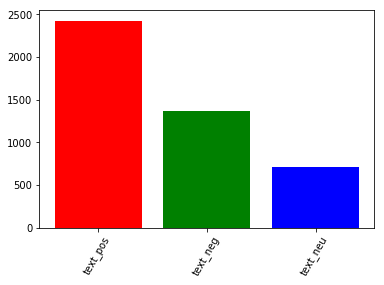

In [21]:
plt.bar(x,y,color='rgb')
plt.xticks(rotation=60)
plt.savefig('visualizations/figure6.png')
plt.show()

## 7. word count

In [22]:
word_count = {}

for head in ' '.join(df.headlines.values).split(' '):
    if head not in word_count:
        word_count[head] = 0
    else:
        word_count[head]+=1

In [23]:
x=word_count.keys()
y=word_count.values()

In [24]:
import numpy as np
var=[]
for values in word_count.values():
    var.append(values)

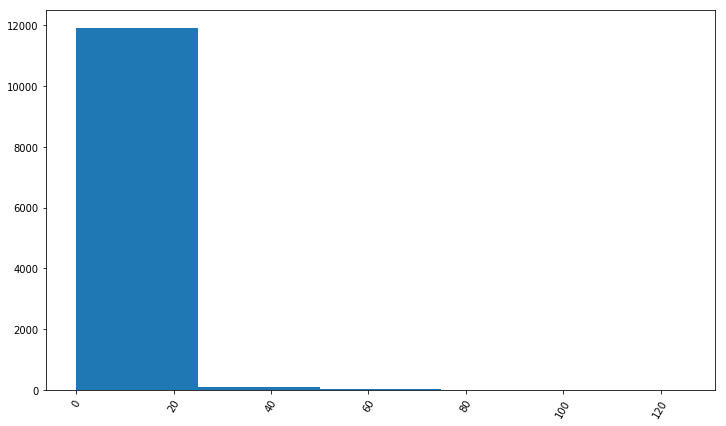

In [25]:
fig, ax = plt.subplots(figsize =(12, 7)) 
ax.hist(var, bins = [0, 25, 50, 75, 100,125])
plt.xticks(rotation=60)
plt.savefig('visualizations/figure7.png')
plt.show()
# not made

In [27]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['year'] = pd.DatetimeIndex(df['date']).year

## 8. month wise sentiment headlines

In [28]:
months=df.month.unique()

month_wise_sentiment = []

for month in months:
    sentiment = {}
    pos = 0
    neu = 0
    neg = 0
    for head in df[df['month']==month].headlines.values:
        

        pol = TextBlob(head).sentiment.polarity
#         print(pol)

        if pol>0:
            pos+=1
        elif pol<0:
            neg+=1
        else:
            neu+=1
    sentiment['pos'] = pos
    sentiment['neg'] = neg
    sentiment['neu'] = neu
    sentiment['month_num'] = month

    
    month_wise_sentiment.append(sentiment)


In [29]:
months=[dic['month_num'] for dic in month_wise_sentiment]

In [30]:
months

[8, 7, 2, 1, 12, 6, 5, 4, 3]

In [31]:
bar1=[dic['pos'] for dic in month_wise_sentiment]
bar2=[dic['neg'] for dic in month_wise_sentiment]
bar3=[dic['neu'] for dic in month_wise_sentiment]

In [32]:
print(bar1)
print(bar2)
print(bar3)

[37, 281, 63, 73, 73, 61, 61, 79, 83]
[28, 221, 43, 47, 46, 56, 51, 39, 63]
[128, 947, 280, 329, 250, 285, 259, 323, 308]


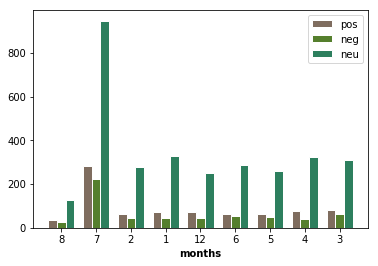

In [33]:
barWidth = 0.25
 
# set height of bar

 
# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='pos')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='neg')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='neu')
 
# Add xticks on the middle of the group bars
plt.xlabel('months', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], ['8', '7', '2', '1', '12', '6', '5', '4', '3'])


# Create legend & Show graphic
plt.legend()
plt.savefig('visualizations/figure8.png')
plt.show()

## 9.month wise sentiment text

In [34]:
months=df.month.unique()

text_wise_sentiment = []

for month in months:
    sentiment = {}
    pos = 0
    neu = 0
    neg = 0
    for head in df[df['month']==month].text.values:
        

        pol = TextBlob(head).sentiment.polarity
#         print(pol)

        if pol>0:
            pos+=1
        elif pol<0:
            neg+=1
        else:
            neu+=1
    sentiment['pos'] = pos
    sentiment['neg'] = neg
    sentiment['neu'] = neu
    sentiment['month_num'] = month
    
    text_wise_sentiment.append(sentiment)

In [35]:
text_wise_sentiment

[{'pos': 97, 'neg': 72, 'neu': 24, 'month_num': 8},
 {'pos': 786, 'neg': 455, 'neu': 208, 'month_num': 7},
 {'pos': 210, 'neg': 122, 'neu': 54, 'month_num': 2},
 {'pos': 248, 'neg': 131, 'neu': 70, 'month_num': 1},
 {'pos': 200, 'neg': 107, 'neu': 62, 'month_num': 12},
 {'pos': 199, 'neg': 128, 'neu': 75, 'month_num': 6},
 {'pos': 219, 'neg': 101, 'neu': 51, 'month_num': 5},
 {'pos': 223, 'neg': 132, 'neu': 86, 'month_num': 4},
 {'pos': 244, 'neg': 124, 'neu': 86, 'month_num': 3}]

In [36]:
months=[dic['month_num'] for dic in text_wise_sentiment]

In [37]:
months

[8, 7, 2, 1, 12, 6, 5, 4, 3]

In [38]:
bar1=[dic['pos'] for dic in text_wise_sentiment]
bar2=[dic['neg'] for dic in text_wise_sentiment]
bar3=[dic['neu'] for dic in text_wise_sentiment]

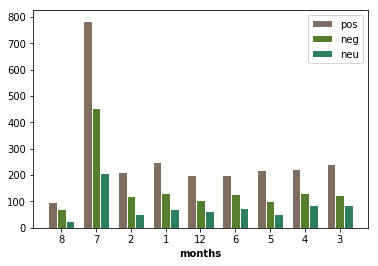

In [39]:
barWidth = 0.25
 
# set height of bar

 
# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='pos')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='neg')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='neu')
 
# Add xticks on the middle of the group bars
plt.xlabel('months', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], ['8', '7', '2', '1', '12', '6', '5', '4', '3'])

 
# Create legend & Show graphic
plt.legend()
plt.savefig('visualizations/figure9.png')
plt.show()

## 10. author wise sentiment heading (top 10)

In [41]:
authors=df.author.unique()

author_wise_sentiment = []

for author in authors:
    sentiment = {}
    pos = 0
    neu = 0
    neg = 0
    for head in df[df['author']==author].headlines.values:
        

        pol = TextBlob(head).sentiment.polarity
#         print(pol)

        if pol>0:
            pos+=1
        elif pol<0:
            neg+=1
        else:
            neu+=1
    sentiment['pos'] = pos
    sentiment['neg'] = neg
    sentiment['neu'] = neu
    sentiment['author'] = author
    
    author_wise_sentiment.append(sentiment)


In [42]:
author_wise_sentiment

[{'pos': 93, 'neg': 84, 'neu': 382, 'author': 'Chhavi Tyagi'},
 {'pos': 46, 'neg': 26, 'neu': 170, 'author': 'Daisy Mowke'},
 {'pos': 16, 'neg': 16, 'neu': 75, 'author': 'Arshiya Chopra'},
 {'pos': 29, 'neg': 29, 'neu': 126, 'author': 'Sumedha Sehra'},
 {'pos': 43, 'neg': 33, 'neu': 163, 'author': 'Aarushi Maheshwari'},
 {'pos': 13, 'neg': 17, 'neu': 77, 'author': 'Sonu Kumari'},
 {'pos': 21, 'neg': 21, 'neu': 63, 'author': 'Parmeet Kaur'},
 {'pos': 49, 'neg': 12, 'neu': 138, 'author': 'Dishant Sharma'},
 {'pos': 13, 'neg': 18, 'neu': 59, 'author': 'Ayushi Ahluwalia'},
 {'pos': 16, 'neg': 8, 'neu': 69, 'author': 'Niharika Prabhakar'},
 {'pos': 6, 'neg': 4, 'neu': 21, 'author': 'Nandini Sinha'},
 {'pos': 29, 'neg': 22, 'neu': 66, 'author': 'Deepali Aggarwal'},
 {'pos': 15, 'neg': 5, 'neu': 33, 'author': 'Ankush Verma'},
 {'pos': 34, 'neg': 23, 'neu': 141, 'author': 'Prashanti Moktan'},
 {'pos': 13, 'neg': 7, 'neu': 69, 'author': 'Radhika Chugh'},
 {'pos': 0, 'neg': 2, 'neu': 1, 'author'

In [43]:
top_10_pos = sorted(author_wise_sentiment, key=lambda d: d['pos'], reverse = True)[:10]
top_10_pos

[{'pos': 93, 'neg': 84, 'neu': 382, 'author': 'Chhavi Tyagi'},
 {'pos': 49, 'neg': 12, 'neu': 138, 'author': 'Dishant Sharma'},
 {'pos': 48, 'neg': 41, 'neu': 129, 'author': 'Mansha Mahajan'},
 {'pos': 46, 'neg': 26, 'neu': 170, 'author': 'Daisy Mowke'},
 {'pos': 44, 'neg': 19, 'neu': 188, 'author': 'Rini Sinha'},
 {'pos': 43, 'neg': 33, 'neu': 163, 'author': 'Aarushi Maheshwari'},
 {'pos': 40, 'neg': 39, 'neu': 246, 'author': 'Tarun Khanna'},
 {'pos': 37, 'neg': 17, 'neu': 154, 'author': 'Saloni Tandon'},
 {'pos': 34, 'neg': 23, 'neu': 141, 'author': 'Prashanti Moktan'},
 {'pos': 32, 'neg': 25, 'neu': 96, 'author': 'Shubhodeep Datta'}]

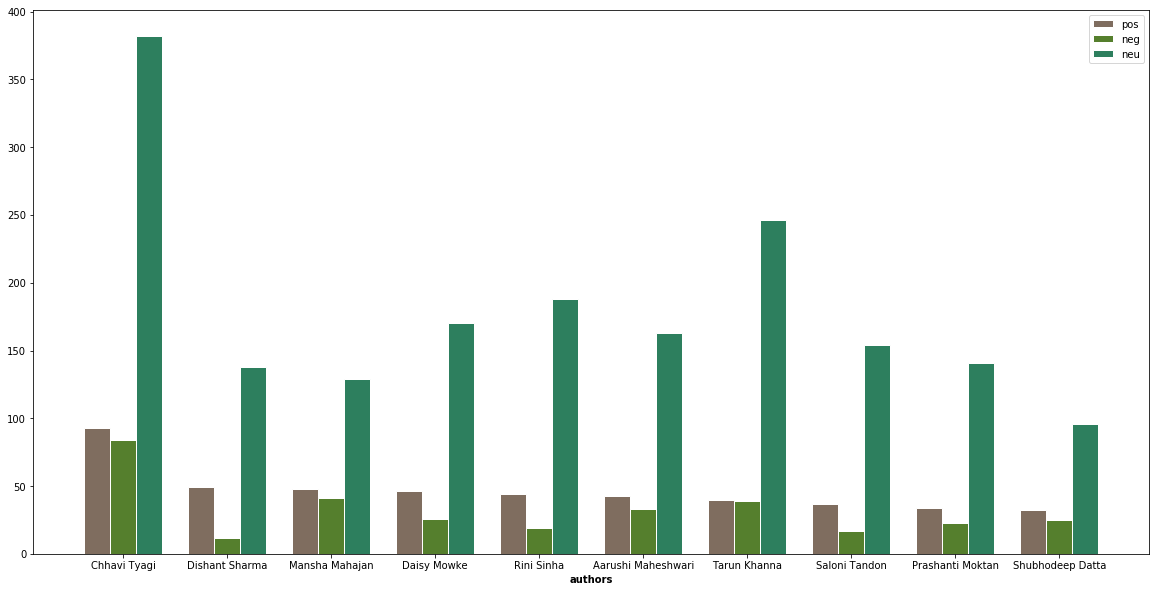

In [44]:
bar1=[dic['pos'] for dic in top_10_pos]
bar2=[dic['neg'] for dic in top_10_pos]
bar3=[dic['neu'] for dic in top_10_pos]

barWidth = 0.25
 
# set height of bar

plt.figure(figsize = (20, 10))

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 

    
# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='pos')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='neg')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='neu')
 
# Add xticks on the middle of the group bars
plt.xlabel('authors', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], [dic['author'] for dic in top_10_pos])

 
# Create legend & Show graphic
plt.legend()
plt.savefig('visualizations/figure10.png')
plt.show()

## 11. author wise sentiment text (top 10)

In [45]:
authors=df.author.unique()

author_wise_sentiment = []

for author in authors:
    sentiment = {}
    pos = 0
    neu = 0
    neg = 0
    for head in df[df['author']==author].text.values:
        

        pol = TextBlob(head).sentiment.polarity
#         print(pol)

        if pol>0:
            pos+=1
        elif pol<0:
            neg+=1
        else:
            neu+=1
    sentiment['pos'] = pos
    sentiment['neg'] = neg
    sentiment['neu'] = neu
    sentiment['author'] = author
    
    author_wise_sentiment.append(sentiment)


In [46]:
author_wise_sentiment

[{'pos': 273, 'neg': 187, 'neu': 99, 'author': 'Chhavi Tyagi'},
 {'pos': 145, 'neg': 59, 'neu': 38, 'author': 'Daisy Mowke'},
 {'pos': 59, 'neg': 30, 'neu': 18, 'author': 'Arshiya Chopra'},
 {'pos': 89, 'neg': 56, 'neu': 39, 'author': 'Sumedha Sehra'},
 {'pos': 118, 'neg': 93, 'neu': 28, 'author': 'Aarushi Maheshwari'},
 {'pos': 52, 'neg': 44, 'neu': 11, 'author': 'Sonu Kumari'},
 {'pos': 47, 'neg': 44, 'neu': 14, 'author': 'Parmeet Kaur'},
 {'pos': 123, 'neg': 45, 'neu': 31, 'author': 'Dishant Sharma'},
 {'pos': 41, 'neg': 35, 'neu': 14, 'author': 'Ayushi Ahluwalia'},
 {'pos': 43, 'neg': 38, 'neu': 12, 'author': 'Niharika Prabhakar'},
 {'pos': 16, 'neg': 13, 'neu': 2, 'author': 'Nandini Sinha'},
 {'pos': 61, 'neg': 41, 'neu': 15, 'author': 'Deepali Aggarwal'},
 {'pos': 35, 'neg': 13, 'neu': 5, 'author': 'Ankush Verma'},
 {'pos': 109, 'neg': 55, 'neu': 34, 'author': 'Prashanti Moktan'},
 {'pos': 48, 'neg': 28, 'neu': 13, 'author': 'Radhika Chugh'},
 {'pos': 1, 'neg': 2, 'neu': 0, 'auth

In [47]:
top_10_pos = sorted(author_wise_sentiment, key=lambda d: d['pos'], reverse = True)[:10]
top_10_pos

[{'pos': 273, 'neg': 187, 'neu': 99, 'author': 'Chhavi Tyagi'},
 {'pos': 162, 'neg': 95, 'neu': 68, 'author': 'Tarun Khanna'},
 {'pos': 145, 'neg': 59, 'neu': 38, 'author': 'Daisy Mowke'},
 {'pos': 140, 'neg': 57, 'neu': 54, 'author': 'Rini Sinha'},
 {'pos': 134, 'neg': 71, 'neu': 13, 'author': 'Mansha Mahajan'},
 {'pos': 123, 'neg': 45, 'neu': 31, 'author': 'Dishant Sharma'},
 {'pos': 118, 'neg': 93, 'neu': 28, 'author': 'Aarushi Maheshwari'},
 {'pos': 111, 'neg': 61, 'neu': 36, 'author': 'Saloni Tandon'},
 {'pos': 109, 'neg': 55, 'neu': 34, 'author': 'Prashanti Moktan'},
 {'pos': 89, 'neg': 56, 'neu': 39, 'author': 'Sumedha Sehra'}]

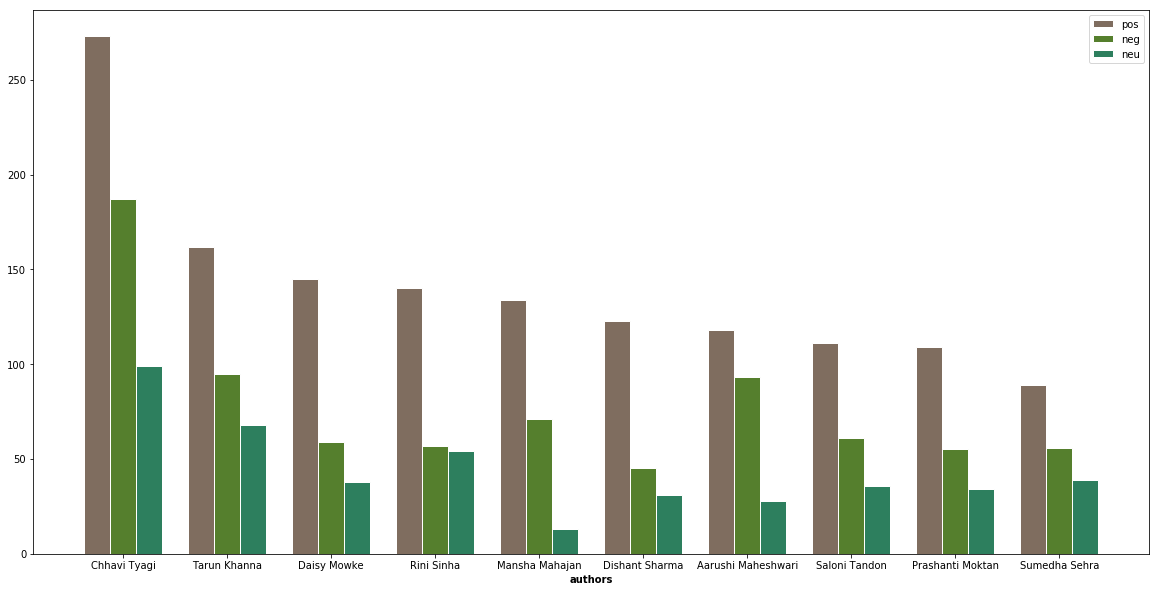

In [48]:
bar1=[dic['pos'] for dic in top_10_pos]
bar2=[dic['neg'] for dic in top_10_pos]
bar3=[dic['neu'] for dic in top_10_pos]

barWidth = 0.25
 
# set height of bar

plt.figure(figsize = (20, 10))

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 

    
# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='pos')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='neg')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='neu')
 
# Add xticks on the middle of the group bars
plt.xlabel('authors', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], [dic['author'] for dic in top_10_pos])

 
# Create legend & Show graphic
plt.legend()
plt.savefig('visualizations/figure12.png')
plt.show()

## 13.year wise sentiment headlines

In [49]:
years=df.year.unique()

head_wise_sentiment = []

for year in years:
    sentiment = {}
    pos = 0
    neu = 0
    neg = 0
    for head in df[df['year']==year].headlines.values:
        

        pol = TextBlob(head).sentiment.polarity
#         print(pol)

        if pol>0:
            pos+=1
        elif pol<0:
            neg+=1
        else:
            neu+=1
    sentiment['pos'] = pos
    sentiment['neg'] = neg
    sentiment['neu'] = neu
    sentiment['year'] = year
    
    head_wise_sentiment.append(sentiment)

In [50]:
head_wise_sentiment

[{'pos': 738, 'neg': 548, 'neu': 2859, 'year': 2017},
 {'pos': 73, 'neg': 46, 'neu': 250, 'year': 2016}]

In [51]:
years=[dic['year'] for dic in head_wise_sentiment]

In [52]:
years

[2017, 2016]

In [53]:
bar1=[dic['pos'] for dic in head_wise_sentiment]
bar2=[dic['neg'] for dic in head_wise_sentiment]
bar3=[dic['neu'] for dic in head_wise_sentiment]

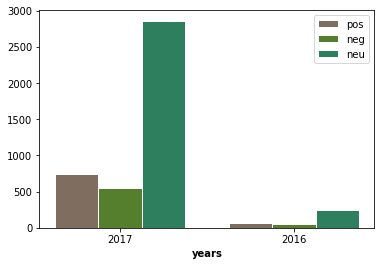

In [54]:
barWidth = 0.25
 
# set height of bar

 
# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='pos')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='neg')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='neu')
 
# Add xticks on the middle of the group bars
plt.xlabel('years', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))],['2017', '2016'])

 
# Create legend & Show graphic
plt.legend()
plt.savefig('visualizations/figure13.png')
plt.show()

## 14. year wise sentiment text

In [59]:
df.head()

,author,date,headlines,read_more,text,ctext,month,day,year
0,Chhavi Tyagi,2017-08-03,Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,8,3,2017
1,Daisy Mowke,2017-08-03,Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo...",8,3,2017
2,Arshiya Chopra,2017-08-03,'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,8,3,2017
3,Sumedha Sehra,2017-08-03,Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,8,3,2017
4,Aarushi Maheshwari,2017-08-03,Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,8,3,2017


In [55]:
years=df.year.unique()

text_wise_sentiment = []

for year in years:
    sentiment = {}
    pos = 0
    neu = 0
    neg = 0
    for head in df[df['year']==year].text.values:
        

        pol = TextBlob(head).sentiment.polarity
#         print(pol)

        if pol>0:
            pos+=1
        elif pol<0:
            neg+=1
        else:
            neu+=1
    sentiment['pos'] = pos
    sentiment['neg'] = neg
    sentiment['neu'] = neu
    sentiment['year'] = year
    
    text_wise_sentiment.append(sentiment)

In [56]:
text_wise_sentiment

[{'pos': 2226, 'neg': 1265, 'neu': 654, 'year': 2017},
 {'pos': 200, 'neg': 107, 'neu': 62, 'year': 2016}]

In [57]:
bar1=[dic['pos'] for dic in text_wise_sentiment]
bar2=[dic['neg'] for dic in text_wise_sentiment]
bar3=[dic['neu'] for dic in text_wise_sentiment]

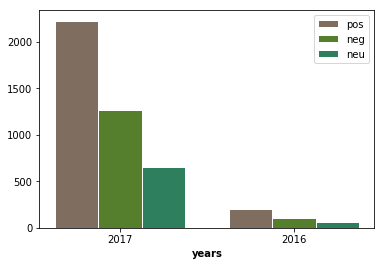

In [58]:
barWidth = 0.25
 
# set height of bar

 
# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width=barWidth, edgecolor='white', label='pos')
plt.bar(r2, bar2, color='#557f2d', width=barWidth, edgecolor='white', label='neg')
plt.bar(r3, bar3, color='#2d7f5e', width=barWidth, edgecolor='white', label='neu')
 
# Add xticks on the middle of the group bars
plt.xlabel('years', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))],['2017', '2016'])

 
# Create legend & Show graphic
plt.legend()
plt.savefig('visualizations/figure14.png')
plt.show()